<a href="https://colab.research.google.com/github/hainsfrancis/credit_score_EDA_Fintech_Business_Case_Study/blob/main/Business_Case_CreditScore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case Study -Credit Score Calculation
---
> Submitted by Hains Francis
---
> **Problem statement**:
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

## Data Processing

### Importing Libraries

In [ ]:
# import neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

### Load Data and Exploratory Data Analaysis

In [ ]:
df=pd.read_csv('/content/Credit_score.csv')

<ipython-input-2-ca7584887116>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Credit_score.csv')


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.Delay_from_due_date.describe()

,Delay_from_due_date
count,100000.000000
mean,21.068780
std,14.860104
min,-5.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


### Data Processing/Cleaning

In [ ]:
# avoiding negative values in some paramteres

df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].clip(lower=0)
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].clip(lower=0)
df['Num_Credit_Card']=df['Num_Credit_Card'].clip(lower=0)
df['Interest_Rate']=df['Interest_Rate'].clip(lower=0)
df['Delay_from_due_date']=df['Delay_from_due_date'].clip(lower=0)
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].clip(lower=0)
df['Total_EMI_per_month']=df['Total_EMI_per_month'].clip(lower=0)
df['Credit_Utilization_Ratio']=df['Credit_Utilization_Ratio'].clip(lower=0)



In [ ]:
# conversion of age into numbers
# excludes numbers preceeeded or followed by underscores of other invalid characters
# exlcudes 3 digit numbers and negative numbers
age_pattern=r'^\D*(?<!-)(\d{1,2})\D*$'
df['Age']=df['Age'].str.extract(age_pattern)

# conversion of invalid strings into nulls
# only keeps the valid strings in the columns
df['SSN'] = df['SSN'].where(df['SSN'].str.contains('^[0-9]{3}-[0-9]{2}-[0-9]{4}$'), np.nan)

# conversion of valid strings to  float number pattern using regex
# clear the mixed data types column by converting the columns in to strings and then applying regex patterns

number_pattern_float=r'^[^\d-]*(\d+\.?\d+|-\d+\.?\d+)\D*$'
df['Annual_Income']=df['Annual_Income'].astype(str).str.strip().str.extract(number_pattern_float)
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(str).str.strip().str.extract(number_pattern_float)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(str).str.strip().str.extract(number_pattern_float)
df['Monthly_Balance']=df['Monthly_Balance'].astype(str).str.strip().str.extract(number_pattern_float)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(str).str.strip().str.extract(number_pattern_float)

pattern_number=r'^\D*(?<!-)(\d*)\D*$' # pattern for non negtavie integer numbers
pattern_number_2=r'^[^\d-]*(-?\d*)\D*$' # pattern for negative integer numbers
df['Num_of_Loan']=df['Num_of_Loan'].astype(str).str.strip().str.extract(pattern_number)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(str).str.strip().str.extract(pattern_number_2)


In [ ]:
# conversion to numeric types
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df['Annual_Income']=pd.to_numeric(df['Annual_Income'],errors='coerce')
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'],errors='coerce')
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')
df['Num_of_Delayed_Payment']=pd.to_numeric(df['Num_of_Delayed_Payment'],errors='coerce')
df['Num_of_Loan']=pd.to_numeric(df['Num_of_Loan'],errors='coerce')

In [ ]:
# processing the credit history age into year fractions
pattern_years=r'^(?:(\d+)\s*[Yy]ears?.*?)?(?:(\d+)\s*[Mm]onths?)?$'

def convert_to_years(duration_str):
    # Use a single regex to capture both years and months
    matched = re.search(pattern_years, duration_str)

    if matched:
        # Extract the captured groups and convert to integers
        years = int(matched.group(1))
        months = int(matched.group(2))

        # Convert months to years
        months_in_years = months / 12

        # Calculate total years
        total_years = years + months_in_years
        return total_years
    else:
        # Return None if no match is found
        return None

In [ ]:
df['Credit_History_Age']=df['Credit_History_Age'].astype(str).str.strip().apply(convert_to_years)

In [ ]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [ ]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
df['Occupation']=df['Occupation'].replace('_______',pd.NA)

In [ ]:
df['Occupation'].unique()

array(['Scientist', <NA>, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
df['Credit_Mix']=df['Credit_Mix'].where(df['Credit_Mix'].isin(['Standard', 'Good', 'Bad']), pd.NA)
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].where(df['Payment_of_Min_Amount'].isin(['No', 'Yes']), pd.NA)
df['Payment_Behaviour']=df['Payment_Behaviour'].where(~df['Payment_Behaviour'].isin(['!@9#%8']),pd.NA)

In [ ]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', <NA>,
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
df['Payment_of_Min_Amount'].unique()

array(['No', <NA>, 'Yes'], dtype=object)

In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,2777
SSN,5572
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
def mode_or_max(group):
    mode_values = group.mode()  # Get mode(s)

    if len(mode_values) == len(group):  # All unique values, no mode
        return group.max()  # Return the maximum value
    elif len(mode_values) > 1:
        # If multiple modes, return the maximum value
        return mode_values.max()
    else:
        # If a single mode, return it
        return mode_values.iloc[0]
#----------------------------------------------------------------------------------------
def mode_or_min(group):
    mode_values = group.mode()  # Get mode(s)

    if len(mode_values) == len(group):  # All unique values, no mode
        return group.min()  # Return the maximum value
        # If multiple modes, return the maximum value
    elif len(mode_values) > 1:
        return mode_values.min()
    else:
        # If a single mode, return it
        return mode_values.iloc[0]
#-----------------------------------------------------------------------------------------
def fillna_group(group):
    mode_value = group.mode()
    if not mode_value.empty:
        return group.fillna(mode_value[0])
    # Fill with a default value if all are NaN
    return group.fillna(0)  # or any other default value


In [ ]:
# transform customer related values in the base dataset
df['Name']=df.groupby('Customer_ID')['Name'].transform(lambda x: x.dropna().mode()[0])
df['Age']=df.groupby('Customer_ID')['Age'].transform(mode_or_max)
df['SSN']=df.groupby('Customer_ID')['SSN'].transform(lambda x: x.dropna().mode()[0])
df['Occupation']=df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.dropna().mode()[0])
df['Annual_Income']=df.groupby('Customer_ID')['Annual_Income'].transform(mode_or_min)
df['Credit_Mix']=df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.dropna().mode()[0])
df['Payment_of_Min_Amount']=df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.dropna().mode()[0])
df['Payment_Behaviour']=df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.dropna().mode()[0])
df['Credit_History_Age']=df.groupby('Customer_ID')['Credit_History_Age'].transform(mode_or_min)

In [ ]:
# fill null values for which aggregation is to be applied
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(fillna_group)
df['Num_of_Loan']=df.groupby('Customer_ID')['Num_of_Loan'].transform(fillna_group)
df['Changed_Credit_Limit']=df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(fillna_group)
df['Num_Credit_Inquiries']=df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(fillna_group)
df['Interest_Rate']=df.groupby('Customer_ID')['Interest_Rate'].transform(fillna_group)
df['Total_EMI_per_month']=df.groupby('Customer_ID')['Total_EMI_per_month'].transform(fillna_group)
df['Amount_invested_monthly']=df.groupby('Customer_ID')['Amount_invested_monthly'].transform(fillna_group)
df['Monthly_Balance']=df.groupby('Customer_ID')['Monthly_Balance'].transform(fillna_group)
df['Monthly_Inhand_Salary']=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(fillna_group)
df['Delay_from_due_date']=df.groupby('Customer_ID')['Delay_from_due_date'].transform(fillna_group)
df['Num_Bank_Accounts']=df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(fillna_group)
df['Num_Credit_Card']=df.groupby('Customer_ID')['Num_Credit_Card'].transform(fillna_group)
df['Outstanding_Debt']=df.groupby('Customer_ID')['Outstanding_Debt'].transform(fillna_group)
df['Credit_Utilization_Ratio']=df.groupby('Customer_ID')['Credit_Utilization_Ratio'].transform(fillna_group)

In [ ]:
def clip_outliers(group):

    # Calculate Q1, Q3, and IQR
    Q1 = group.quantile(0.05)
    Q3 = group.quantile(0.95)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #conditions
    c1= lower_bound > group.min()
    c2= upper_bound < group.max()
    # Print the current min and max, and the new bounds
    if c1|c2 :print(f"no of elements in the group {len(group)},IQR {IQR},\n {list(group)},\n new list {list(group.clip(lower=lower_bound, upper=upper_bound))}")
    if c1 :print(f"New min: {lower_bound}, Old min: {group.min()}")
    if c2 :print(f"New max: {upper_bound}, Old max: {group.max()}")

    # Clip the values and return
    return group.clip(lower=lower_bound, upper=upper_bound)

In [ ]:
df['Monthly_Inhand_Salary'].describe()

,Monthly_Inhand_Salary
count,100000.000000
mean,4198.350924
std,3187.402015
min,303.645417
25%,1626.761667
50%,3095.978333
75%,5961.637500
max,15204.633330


In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# grouping data for customer level dataframe for further analysis
df_grp=df.groupby('Customer_ID').agg({
                                'Name':'first',
                                'Age':'first',
                                'SSN':'first',
                                'Occupation':'first',
                                'Annual_Income':'first',
                                'Monthly_Inhand_Salary':'mean',
                                'Num_Bank_Accounts':mode_or_max,
                                'Num_Credit_Card':mode_or_max,
                                'Interest_Rate':'mean',
                                'Num_of_Loan':'max',
                                'Delay_from_due_date':'max',
                                'Num_of_Delayed_Payment':'mean',
                                'Changed_Credit_Limit':'mean',
                                'Num_Credit_Inquiries':'mean',
                                'Credit_Mix':'first',
                                'Outstanding_Debt':'mean',
                                'Credit_Utilization_Ratio':'mean',
                                'Credit_History_Age':'first',
                                'Payment_of_Min_Amount':'first',
                                'Total_EMI_per_month':'mean',
                                'Amount_invested_monthly':'mean',
                                'Payment_Behaviour':'first',
                                'Monthly_Balance':'mean'


}).reset_index()

### Outlier Treatment of Customer Level Dataframe

In [ ]:
# clipping various values,based on intercolumn relationships/finding weak upperbound

# credit history cant be higher than the age, and cant be lower than zero
df_grp['Credit_History_Age']=df_grp['Credit_History_Age'].clip(lower=0,upper=df_grp['Age'])

# credit utilization Ratio is a percentage cant be lower than 0
df_grp['Credit_Utilization_Ratio']=df_grp['Credit_Utilization_Ratio'].clip(lower=0)

# Outstanding_Debt,Annual_Income,Monthly_Inhand_Salary cant be negative
df_grp['Outstanding_Debt']=df_grp['Outstanding_Debt'].clip(lower=0)
df_grp['Annual_Income']=df_grp['Annual_Income'].clip(lower=0)
df_grp['Monthly_Inhand_Salary']=df_grp['Monthly_Inhand_Salary'].clip(lower=0,upper=df_grp['Annual_Income'])

# weak upper bound for Total EMI and Amount Invested Monthly
df_grp['Total_EMI_per_month']=df_grp['Total_EMI_per_month'].clip(lower=0, upper=df_grp['Outstanding_Debt'])
df_grp['Amount_invested_monthly']=df_grp['Amount_invested_monthly'].clip(lower=0,upper=df_grp['Monthly_Inhand_Salary'])

# assering non negative monthly Balance
df_grp['Monthly_Balance']=df_grp['Monthly_Balance'].clip(lower=0)
# -----------------------------------------------------------------------------------------------------------------
def clip_outliers_col(col, clipdtype='f'):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if clipdtype=='f':
        return col.clip(lower=lower_bound, upper=upper_bound)

    elif clipdtype=='i':
        return col.clip(lower=0, upper=upper_bound).astype(int)

#--------------------------------------------------------------------------------------------------
#use IQR method to clip the outliers to integer values
df_grp['Num_of_Loan'] = clip_outliers_col(df_grp['Num_of_Loan'], clipdtype='i')
df_grp['Num_of_Delayed_Payment'] = clip_outliers_col(df_grp['Num_of_Delayed_Payment'], clipdtype='i')
df_grp['Num_Credit_Inquiries'] = clip_outliers_col(df_grp['Num_Credit_Inquiries'], clipdtype='i')
#----------------------------------------------------------------------------------------------------
# use iqr method to clip the interest rate column
df_grp['Interest_Rate'] = clip_outliers_col(df_grp['Interest_Rate'], clipdtype='f')
#------------------------------------------------------------------------------------------------------
#use iqr method to further clip the columns
df_grp['Total_EMI_per_month']=clip_outliers_col(df_grp['Total_EMI_per_month'], clipdtype='f')
df_grp['Amount_invested_monthly']=clip_outliers_col(df_grp['Amount_invested_monthly'], clipdtype='f')

#### Insights
> column to column relationships for age and credit history age is used to find a weak upper bound for credit history age
>credit utilization Ratio is a percentage cant be lower than 0
>Outstanding_Debt,Annual_Income,Monthly_Inhand_Salary cant be negative
> IQR outlier treatment is done further on these values modified with intercolumn relationships for further treatment

### Feature Creation in Customer Level Dataframe(Primary Features)

In [ ]:
# creation of features
df_grp['Debt_to_Income_Ratio']=(df_grp['Outstanding_Debt']/df_grp['Annual_Income'])*100
# Repayment Capacity, typically 40 % of avaiable salary is required for expenses
# Fixed Obligations to Income Ratio(FOIR), is to be capped at 60%(typically as per provision for expenses)
# anything above that ratio is unhealthy
df_grp['FOIR']=(df_grp['Total_EMI_per_month']/df_grp['Monthly_Inhand_Salary'])*100

#### Insights
> feature Debt to Income Ratio : shows how much leveraged the borrower is
> Feature FOIR(Fixed Obligations to Income Ratio): shows how much of monthly inhand salary borrower is spending as EMI/Monthly payaments
> there are anomalous values of FOIR and EMI in the dataset which require further context, to interpret

In [ ]:
df_grp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12500.0,33.343440,10.765391,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,12500.0,50505.123449,38300.762656,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,12500.0,4198.350924,3187.152156,303.645417,1625.744479,3097.016667,5962.529583,15204.633330
Num_Bank_Accounts,12500.0,5.371280,2.592614,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,12500.0,5.536160,2.066861,1.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,12500.0,20.634830,16.600759,1.000000,8.000000,16.000000,27.000000,55.500000
Num_of_Loan,12500.0,3.849360,2.880912,0.000000,2.000000,3.000000,6.000000,12.000000
Delay_from_due_date,12500.0,23.408480,14.875030,0.000000,12.000000,20.000000,30.000000,67.000000
Num_of_Delayed_Payment,12500.0,14.043040,7.587012,0.000000,9.000000,14.000000,19.000000,33.000000
Changed_Credit_Limit,12500.0,10.385703,6.554899,-1.070000,5.433750,9.387500,14.670000,31.115000


### Visual Analaysis of Customer Level Dataframe

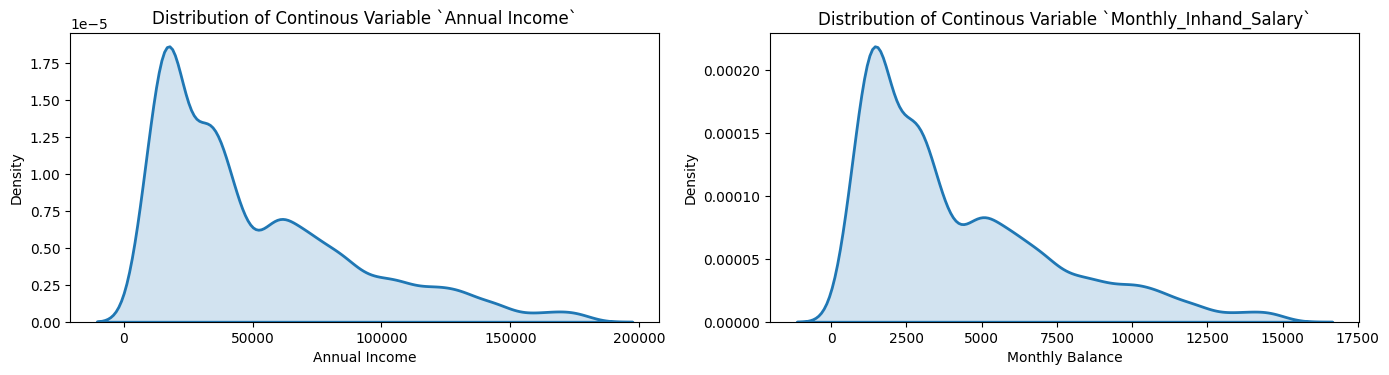

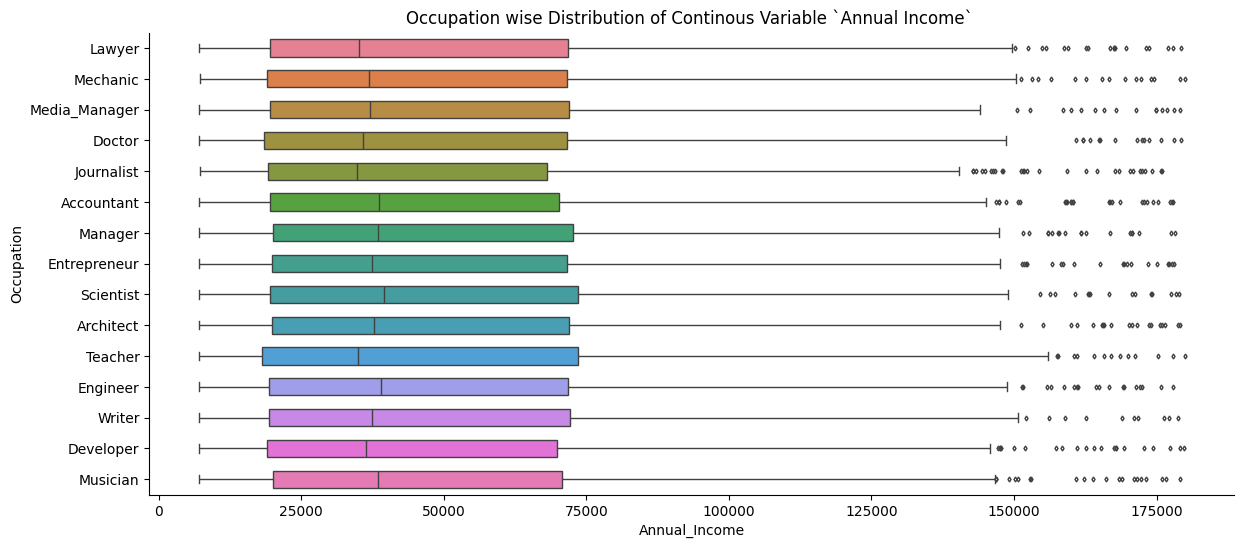

In [ ]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(x='Annual_Income',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Annual Income`')
plt.xlabel('Annual Income')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(x='Monthly_Inhand_Salary',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Monthly_Inhand_Salary`')
plt.xlabel('Monthly Balance')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Annual_Income',y='Occupation',hue='Occupation',width=0.7,gap=0.2,data=df_grp,flierprops=dict(marker='d', markersize=2.5))
sns.despine()
plt.title('Occupation wise Distribution of Continous Variable `Annual Income` ')
plt.show()

#### Insights
> left skewed distribution for annual income and monthly salary
> more quantity of lower to middle income people present in the dataset

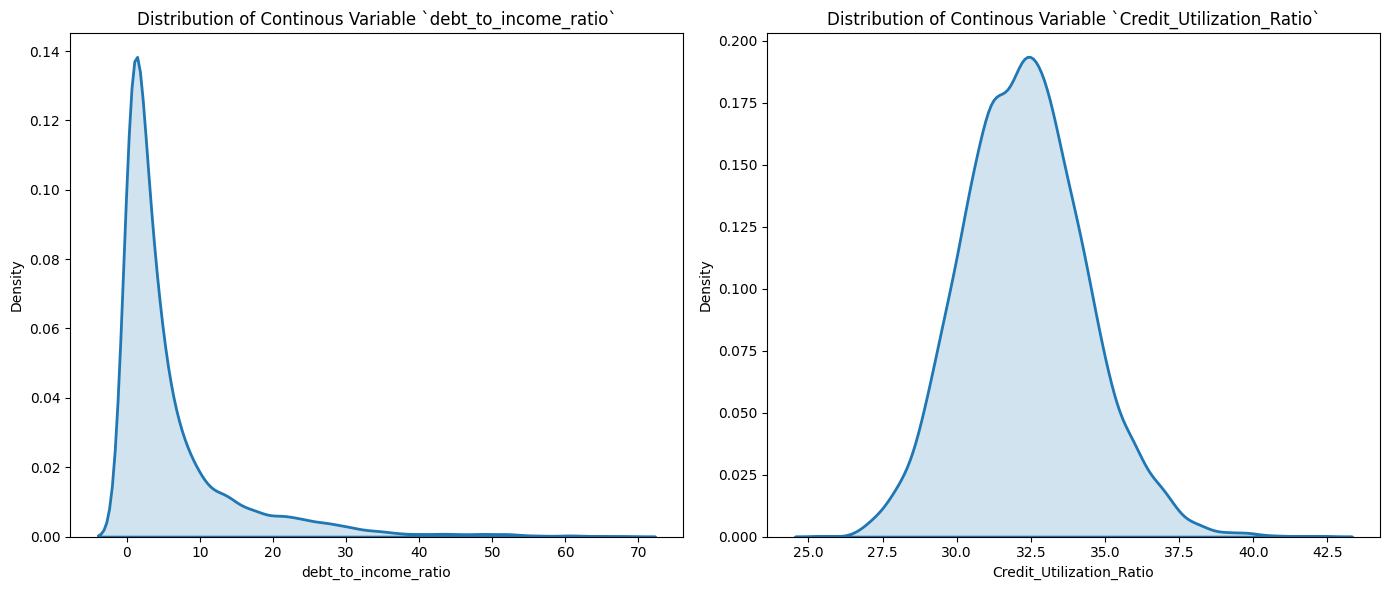

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.kdeplot(x='Debt_to_Income_Ratio',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `debt_to_income_ratio`')
plt.xlabel('debt_to_income_ratio')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(x='Credit_Utilization_Ratio',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Credit_Utilization_Ratio`')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### Insights
> Credit Utilization ratio is approximately normally distributed, doesnt show skewness while debt to income ratio shows skewness most people are in 0-20 precent of annual income
> could indicate the these are short term lesser ticket size credits

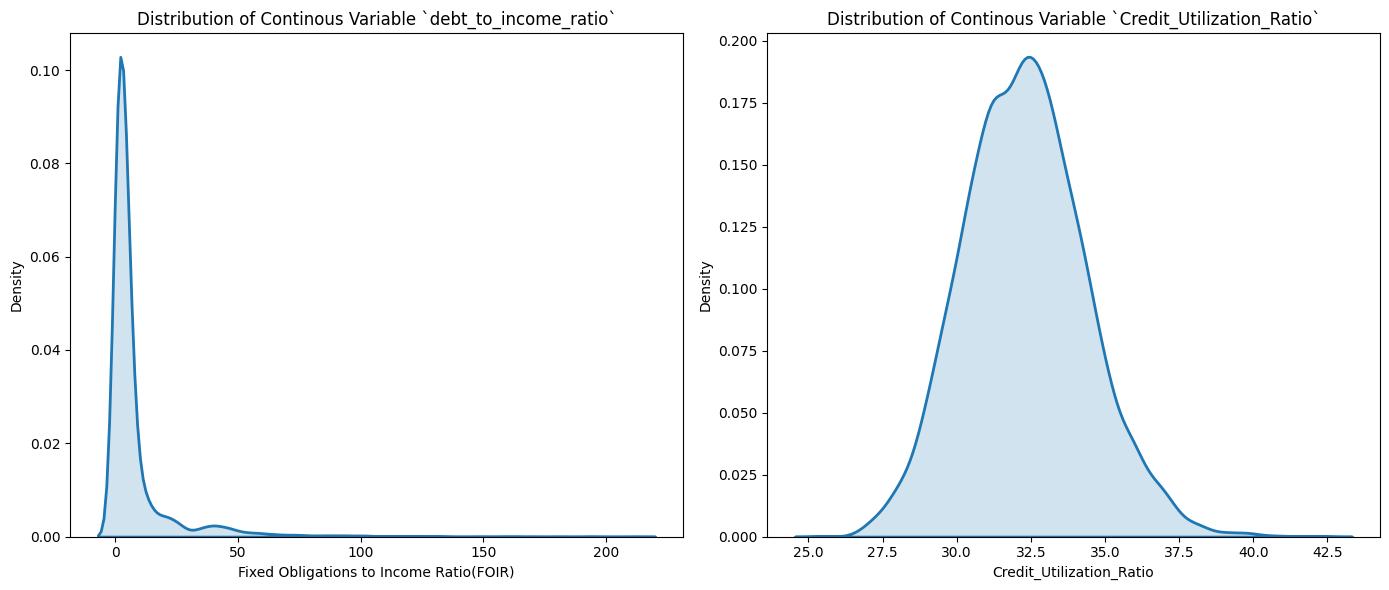

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.kdeplot(x='FOIR',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `debt_to_income_ratio`')
plt.xlabel('Fixed Obligations to Income Ratio(FOIR)')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(x='Credit_Utilization_Ratio',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Credit_Utilization_Ratio`')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
condition1 =df_grp['Total_EMI_per_month']>df_grp['Monthly_Inhand_Salary']
condition2 =df_grp['Total_EMI_per_month']>df_grp['Annual_Income']/12
df_grp[condition1&condition2][['Name','Outstanding_Debt','Total_EMI_per_month','Monthly_Inhand_Salary','Annual_Income','Debt_to_Income_Ratio','FOIR']]

,Name,Outstanding_Debt,Total_EMI_per_month,Monthly_Inhand_Salary,Annual_Income,Debt_to_Income_Ratio,FOIR
623,Younglait,3918.55,647.036343,393.698750,7064.385,55.469089,164.348082
840,Praveenq,1829.92,647.036343,612.682083,7604.185,24.064643,105.607192
1013,Ana Nicolacik,3854.27,647.036343,333.596667,7435.160,51.838427,193.957676
1614,Steven C.g,2518.98,647.036343,625.468750,7709.625,32.673184,103.448229
1778,Polansekx,1345.66,647.036343,530.338750,7252.065,18.555542,122.004350
1825,Paulj,1965.56,647.036343,409.879167,7558.550,26.004459,157.860266
2075,Anna Yukhananovm,2354.21,647.036343,533.608750,7495.305,31.409129,121.256697
3792,Ronald Grovers,4559.45,647.036343,357.255833,7455.070,61.159050,181.112884
4151,McCooll,3900.85,647.036343,568.907083,7282.885,53.561878,113.733220
4824,Jed Horowitzo,4273.06,647.036343,546.809167,7641.710,55.917589,118.329462


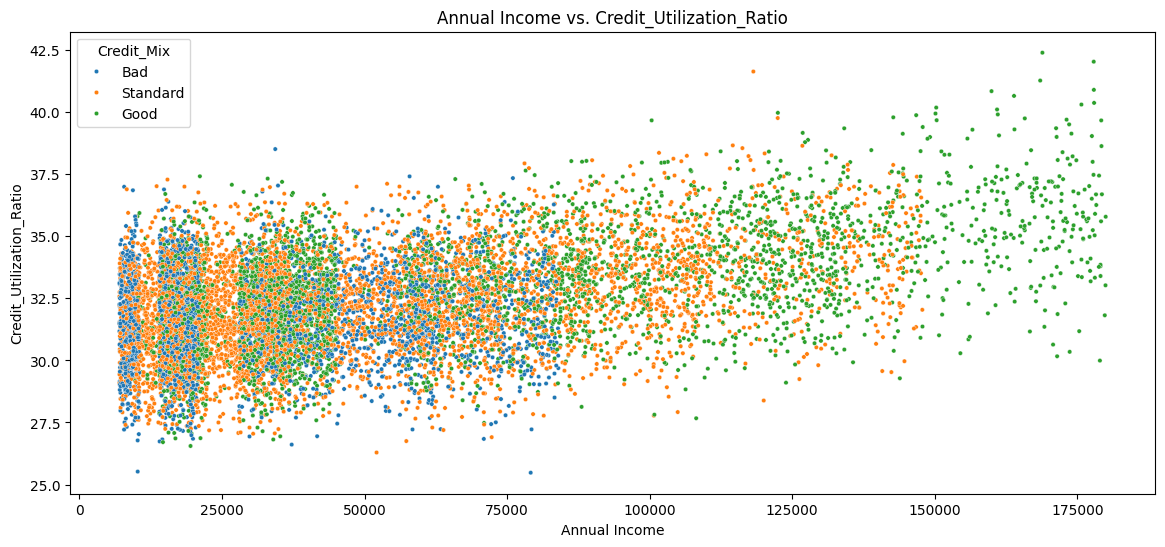

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_grp, x='Annual_Income', y='Credit_Utilization_Ratio', hue='Credit_Mix',s=10)
plt.title("Annual Income vs. Credit_Utilization_Ratio")
plt.xlabel("Annual Income")
plt.ylabel("Credit_Utilization_Ratio")
plt.show()

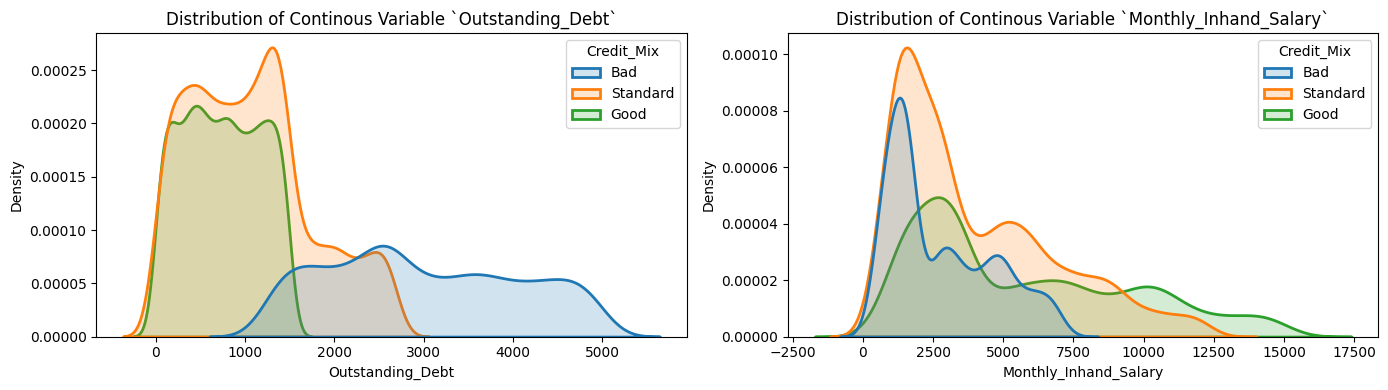

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(x='Outstanding_Debt',hue='Credit_Mix',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Outstanding_Debt`')
plt.xlabel('Outstanding_Debt')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.kdeplot(x='Monthly_Inhand_Salary',hue='Credit_Mix',data=df_grp,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Monthly_Inhand_Salary`')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### Insights
> Outstading Debt is higher for Bad Credit Mix
> Monthly Inhand Salary is lower for Bad Credit Mix
> shows these segment is highly leveraged


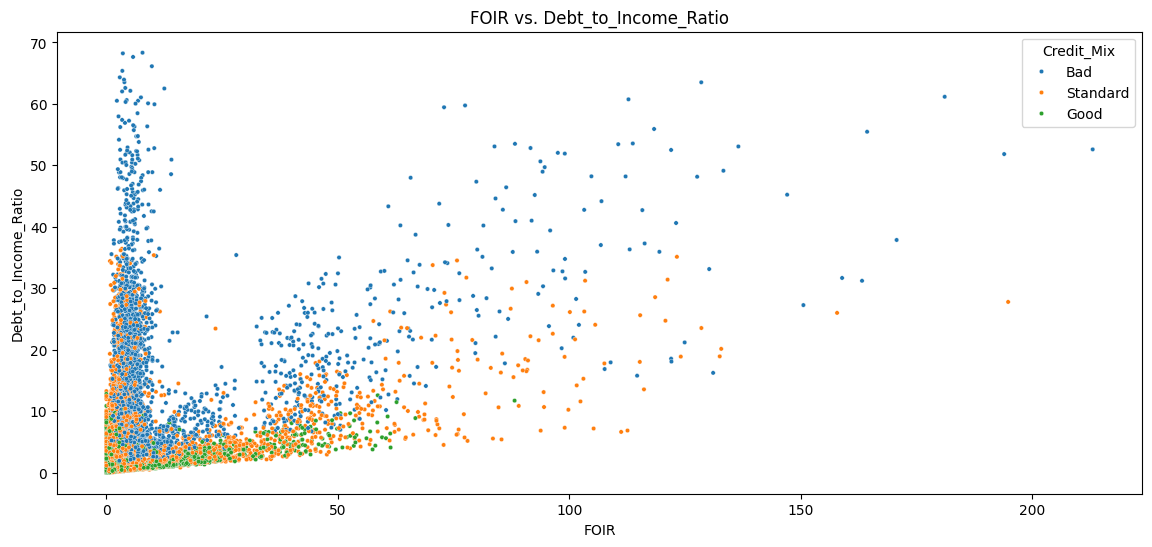

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_grp, x='FOIR', y='Debt_to_Income_Ratio', hue='Credit_Mix',s=10)
plt.title("FOIR vs. Debt_to_Income_Ratio")
plt.xlabel("FOIR")
plt.ylabel("Debt_to_Income_Ratio")
plt.show()

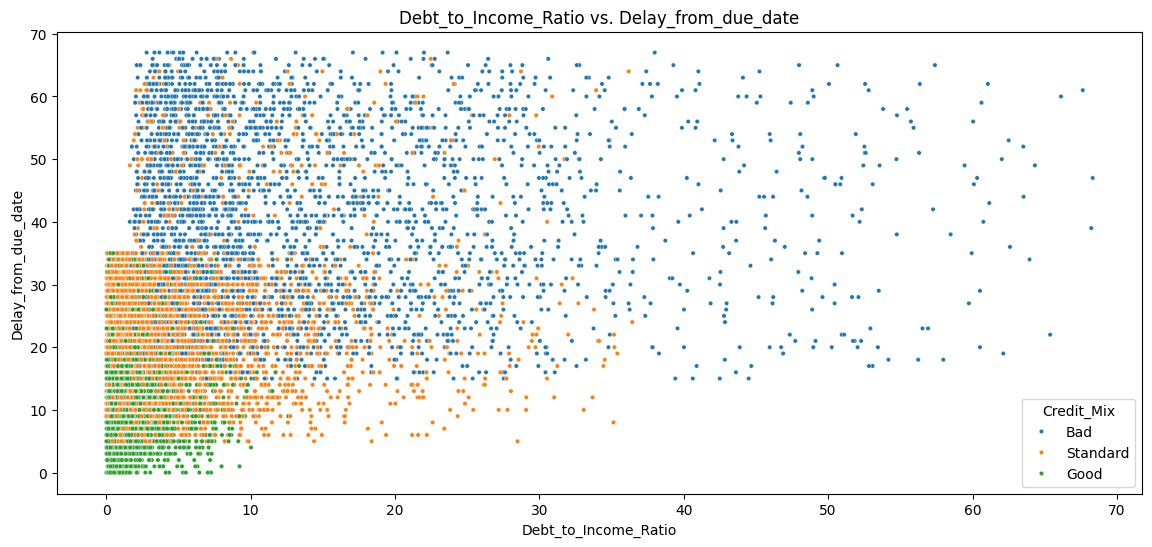

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_grp, x='Debt_to_Income_Ratio', y='Delay_from_due_date', hue='Credit_Mix',s=10)
plt.title("Debt_to_Income_Ratio vs. Delay_from_due_date")
plt.xlabel("Debt_to_Income_Ratio")
plt.ylabel("Delay_from_due_date")
plt.show()

Text(0, 0.5, 'Density')

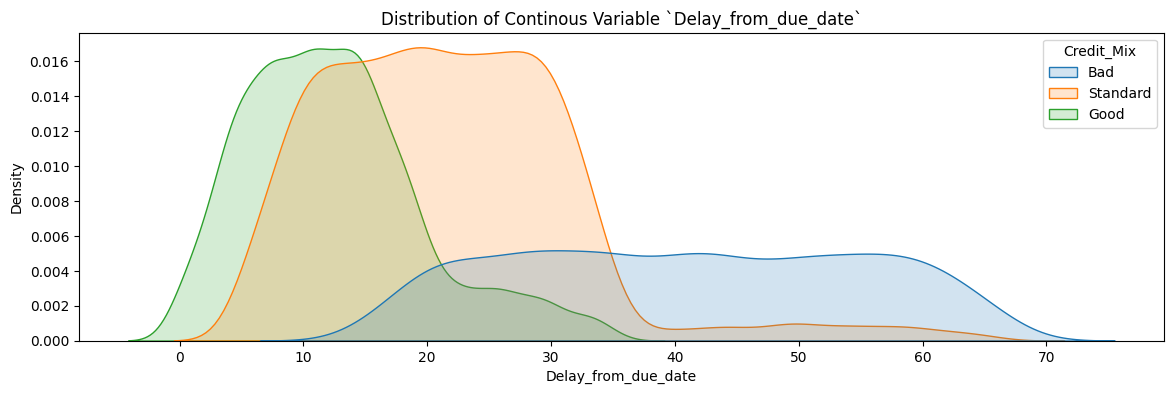

In [ ]:
plt.figure(figsize=(14,4))
sns.kdeplot(x='Delay_from_due_date',hue='Credit_Mix',data=df_grp,fill=True,alpha=0.20,linewidth=1)
plt.title('Distribution of Continous Variable `Delay_from_due_date`')
plt.xlabel('Delay_from_due_date')
plt.ylabel('Density')

#### Insights
> Higher Debt to Income Ratio is related to delay from due date, shows a Bad Credit Mix indicates more delay in payment

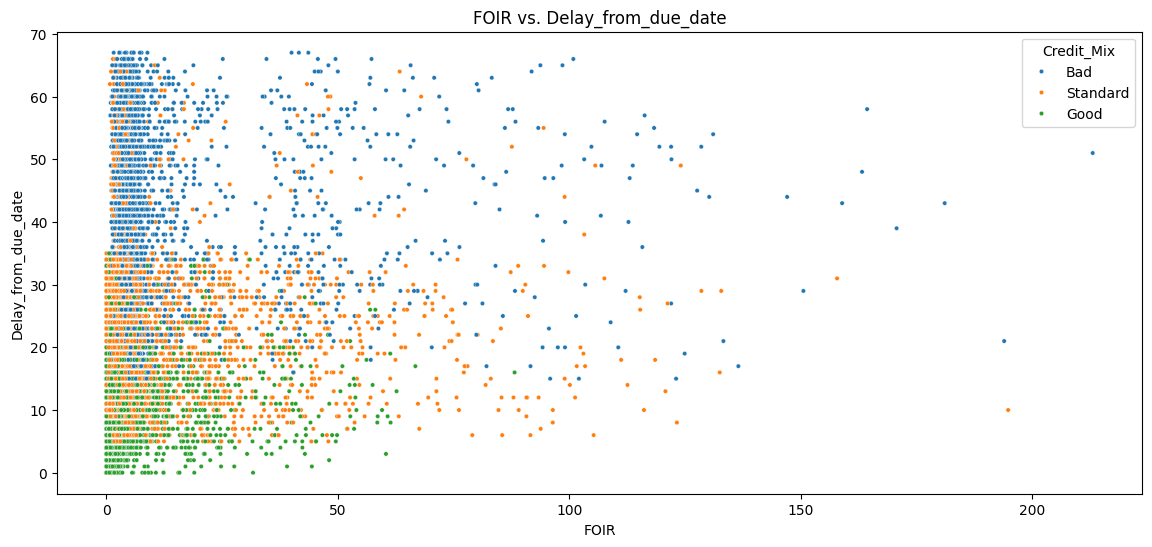

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_grp, x='FOIR', y='Delay_from_due_date', hue='Credit_Mix',s=10)
plt.title("FOIR vs. Delay_from_due_date")
plt.xlabel("FOIR")
plt.ylabel("Delay_from_due_date")
plt.show()

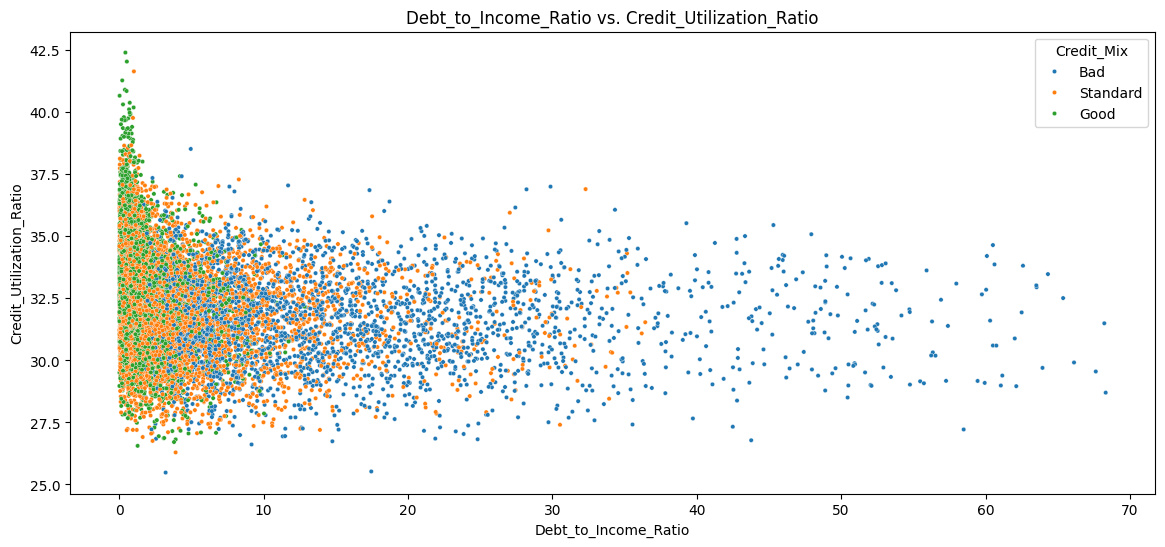

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_grp, x='Debt_to_Income_Ratio', y='Credit_Utilization_Ratio', hue='Credit_Mix',s=10)
plt.title("Debt_to_Income_Ratio vs. Credit_Utilization_Ratio")
plt.xlabel("Debt_to_Income_Ratio")
plt.ylabel("Credit_Utilization_Ratio")
plt.show()

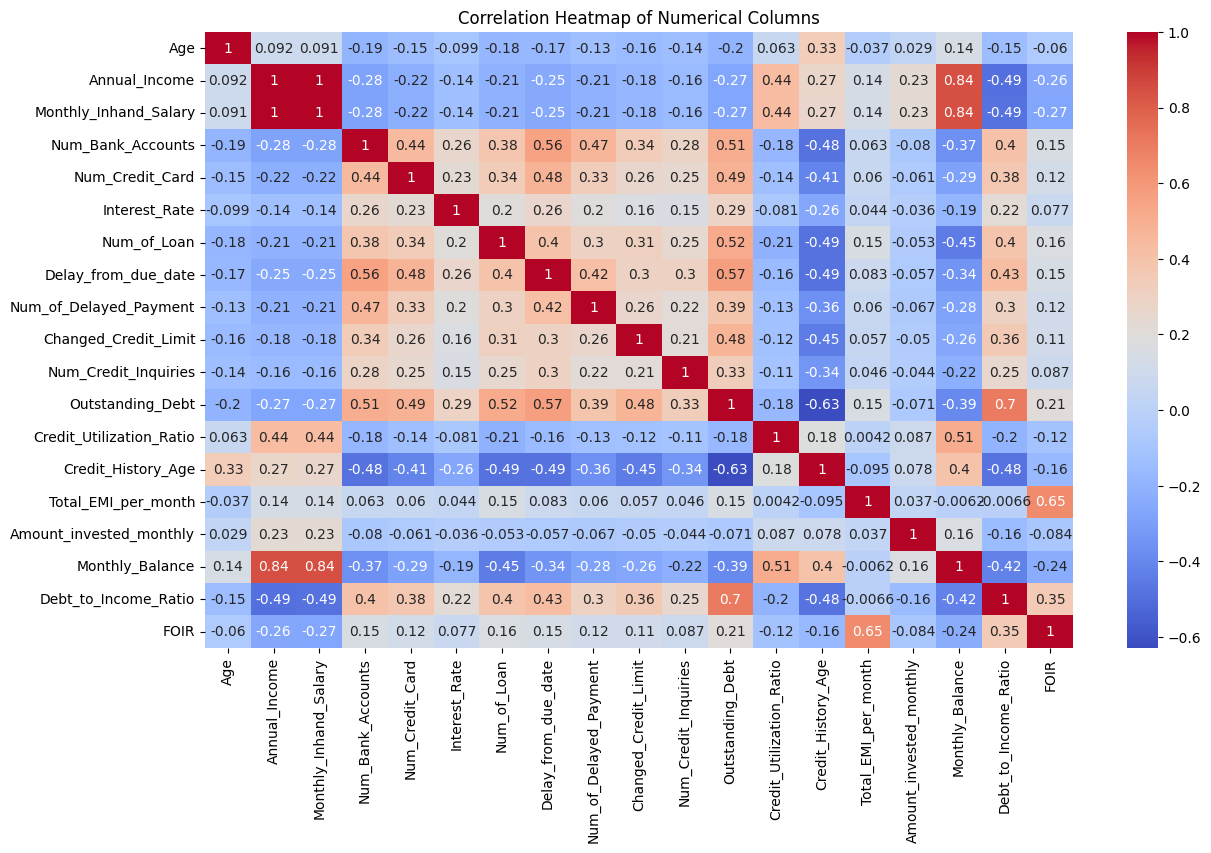

In [ ]:
# Select only numerical columns from df_grp
df_numeric = df_grp.select_dtypes(include=['number'])

# Create the heatmap for the correlation matrix of numerical columns
plt.figure(figsize=(14, 8))  # Adjust size if needed
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### Feature Engineering for Calcualtion of Credit Score

In [ ]:
# Encode the categorical features

# payment of minimum amount
df_scaled=df_grp.copy()
df_scaled['Payment_of_Min_Amount']=df_scaled['Payment_of_Min_Amount'].replace({'Yes':1,'No':0,pd.NA:0})

# credit mix
df_scaled['Credit_Mix']=df_scaled['Credit_Mix'].replace({'Standard':1,'Good':2,'Bad':0,pd.NA:1})

# i need to scale using min max sacaler, since data is skewed we used min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled['Delay_from_due_date']=scaler.fit_transform(df_scaled[['Delay_from_due_date']])
df_scaled['Num_of_Delayed_Payment']=scaler.fit_transform(df_scaled[['Num_of_Delayed_Payment']])
df_scaled['Num_of_Loan']=scaler.fit_transform(df_scaled[['Num_of_Loan']])
df_scaled['Num_Credit_Card']=scaler.fit_transform(df_scaled[['Num_Credit_Card']])
df_scaled['Credit_History_Age']=scaler.fit_transform(df_scaled[['Credit_History_Age']])
df_scaled['Num_Credit_Inquiries']=scaler.fit_transform(df_scaled[['Num_Credit_Inquiries']])
df_scaled['Credit_Mix']=scaler.fit_transform(df_scaled[['Credit_Mix']])
df_scaled['Changed_Credit_Limit']=scaler.fit_transform(df_scaled[['Changed_Credit_Limit']])

# we arent scaling ratios, since they are already scaled when operating on variables
df_scaled['Debt_to_Income_Ratio']=df_scaled['Debt_to_Income_Ratio']/100
df_scaled['Credit_Utilization_Ratio']=df_scaled['Credit_Utilization_Ratio']/100
# since FOIR has anomalous values above 100, we require to scale them to get values between 0 to 1
df_scaled['FOIR']=df_scaled['FOIR']/100
df_scaled['FOIR']=scaler.fit_transform(df_scaled[['FOIR']])
#---------------------------------------------------------------------------------------------------------------
# credit score calculation

# strategy for creating credit score
# Payment history (35%) - consists of delay from due date, num of delayed payments, whether only critical amount was paid
# Amount owed (30%) debt to income ratio, credit utilization, no of credit cards
# Length of credit history (15%) crdit history age
# New credit (10%) number of credit inuqiry, changed credit limit, FOIR
# Credit mix (10%) already credit mix is present

df_scaled['Payment_History_Score']= 1-(0.4)*df_scaled['Delay_from_due_date'] \
                                     -(0.4)*df_scaled['Num_of_Delayed_Payment'] \
                                     -(0.2)*df_scaled['Payment_of_Min_Amount']
# more delay will reuction in credit score, more number of delayed payment will decrease the score,
# only payment of minimum amount reduces
df_scaled['Amount_owed_Score']=1-(0.3)*df_scaled['Debt_to_Income_Ratio']\
                                -(0.3)*df_scaled['Credit_Utilization_Ratio']\
                                -(0.2)*df_scaled['Num_Credit_Card']\
                                -(0.2)*df_scaled['Num_of_Loan']
# high debt to income ratio reduces
df_scaled['Length_of_credit_history_Score']=df_scaled['Credit_History_Age']

df_scaled['Increment_CreditLimit_Score']=1-(0.4)*df_scaled['Num_Credit_Inquiries']\
                                          -(0.4)*df_scaled['Changed_Credit_Limit']

df_scaled['Credit_Mix_Score']=df_scaled['Credit_Mix']

In [ ]:
df_scaled[['Delay_from_due_date','Num_of_Delayed_Payment','Payment_of_Min_Amount','Debt_to_Income_Ratio','Credit_Utilization_Ratio','Num_Credit_Card','Num_of_Loan','Num_Credit_Inquiries','Changed_Credit_Limit']].describe().T


,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,12500.0,0.349380,0.222015,0.000000,0.179104,0.298507,0.447761,1.000000
Num_of_Delayed_Payment,12500.0,0.425547,0.229909,0.000000,0.272727,0.424242,0.575758,1.000000
Payment_of_Min_Amount,12500.0,0.594320,0.491043,0.000000,0.000000,1.000000,1.000000,1.000000
Debt_to_Income_Ratio,12500.0,0.060657,0.087428,0.000003,0.009572,0.028250,0.069716,0.683252
Credit_Utilization_Ratio,12500.0,0.322852,0.020606,0.254766,0.308545,0.322418,0.336002,0.423953
Num_Credit_Card,12500.0,0.453616,0.206686,0.000000,0.300000,0.400000,0.600000,1.000000
Num_of_Loan,12500.0,0.320780,0.240076,0.000000,0.166667,0.250000,0.500000,1.000000
Num_Credit_Inquiries,12500.0,0.353326,0.290684,0.000000,0.142857,0.285714,0.476190,1.000000
Changed_Credit_Limit,12500.0,0.355933,0.203663,0.000000,0.202074,0.324918,0.489048,1.000000


In [ ]:
df_scaled[df_scaled['Payment_History_Score']>1]
df_scaled[df_scaled['Amount_owed_Score']>1]
df_scaled[df_scaled['Length_of_credit_history_Score']>1]
df_scaled[df_scaled['Increment_CreditLimit_Score']>1]
df_scaled[df_scaled['Credit_Mix_Score']>1]
# checking if the scores are beyond 1 due to errors
# no scores are beyond 1

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Debt_to_Income_Ratio,FOIR,Payment_History_Score,Amount_owed_Score,Length_of_credit_history_Score,Increment_CreditLimit_Score,Credit_Mix_Score


In [ ]:
# credit score calculation

# strategy
# Payment history (35%) -
# Amount owed (30%)
# Length of credit
# New credit (10%)
# Credit mix (10%) t

df_scaled['Credit_Score']=  0.35*df_scaled['Payment_History_Score']\
                          + 0.30*df_scaled['Amount_owed_Score']\
                          + 0.15*df_scaled['Length_of_credit_history_Score']\
                          + 0.10*df_scaled['Increment_CreditLimit_Score']\
                          + 0.10*df_scaled['Credit_Mix']
# fitting the score from 300 to 900
scaler = MinMaxScaler(feature_range=(300, 900))
df_scaled['Credit_Score'] = scaler.fit_transform(df_scaled[['Credit_Score']])
df_scaled['Credit_Score'].describe()

#### Insights
> required values are normalized, usig min max scaling since the data was skewed as evident from the visual analysis
> A credit score is designed to measure your risk as a borrower. the hypothetical credit score calculation incorporates five major components, with varying levels of importance. These categories with their relative weights are:
as given below

>Payment history (35%)
>Amount owed (30%)
>Length of credit history (15%)
>New credit (10%)
>Credit mix (10%)
>each categories get its own column and is aggregarted to get a credit score

>strategy for creating credit score
Payment history (35%) - consists of delay from due date, num of delayed payments, whether only critical amount was paid
Amount owed (30%) debt to income ratio, credit utilization, no of credit cards
Length of credit history (15%) crdit history age
New credit (10%) number of credit inuqiry, changed credit limit, FOIR
Credit mix (10%) already credit mix is present

>Payment History(35%): our calculation includes delay from due date, as delay increases score should decrease, sub wieughtate of 40 % is given for days of delay, 40 % for number of dealyed payments, 20 % for whether minimum amount is paid
> Amount Owed(30%): borrowers debt to income ratio shows how leveraged the borrower is with current debt, similarly credit utilization ratio shows how much of credit limit borrower has used, more usage is not good. increasing number of credit cards and loans are also negatively affecting the score
> Length of credit history (15%): credit history age is standardized for this feature, more age implies less risk
> New Credit(10%): number of new loan enquires reduces the score since it represent financial instability
> Credit mix(10%): feature already present in data set

### Credit Score Visualization

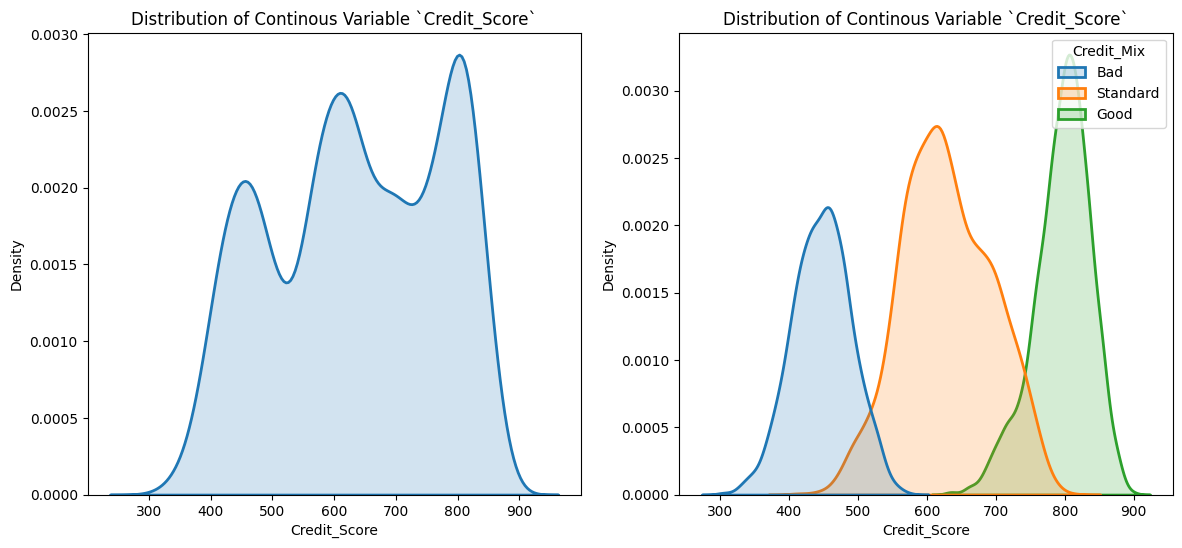

In [ ]:
data=df_grp.copy()
data['Credit_Score']=df_scaled['Credit_Score']
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.kdeplot(x='Credit_Score',data=data,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Credit_Score`')
plt.subplot(1,2,2)
sns.kdeplot(x='Credit_Score',hue='Credit_Mix',data=data,fill=True,alpha=0.20,linewidth=2)
plt.title('Distribution of Continous Variable `Credit_Score`')
plt.xlabel('Credit_Score')
plt.ylabel('Density')
plt.show()

In [ ]:
data['Credit_Score'].describe()
# mininum score is 300 and maximum score is 900

,Credit_Score
count,12500.000000
mean,636.368484
std,138.295079
min,300.000000
25%,521.816616
50%,637.094287
75%,764.011177
max,900.000000


#### Insights
> minimum score is 300
> maximum score is 900
> distribution clearly shows 3 peaks, on further analyis it shows that credit score shows there are 3 credit mixes in the data, and the scores are proportial to credit mixes with bad getting the lowest score and good getting the highest score
> this shows the scores are aggregating features to represent the potential creditworthiness of the applicant/customer